# OBJECTIVE: CAN YOU PREDICT  A PATIENT'S  COVID STATUS?

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('corona.csv')

## DATA UNDERSTANDING

In [3]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [5]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742595,2020-03-11,0,1,0,0,0,negative,NaN,male,Other


__HYPOTHESIS QUESTION__
1. During which period did most people test positive for covid?
2. Does the patient suffer from a cough?
3. Does the patient suffer from a fever?
4. Does the patient suffer from a sore_throat?
5. Does the patient suffer from shortness of breath?
6. Does the patient suffer from a headache?
7. Is age and covid infection related?
8. Is gender and covid infection related?
9. Is Covid communicable once you get into contact with an infected person?

__ANSWERS TO THE HYPOTHESIS QUESTIONS BASED ON GENERAL KNOWLEDGE__
1. In different periods we might receive different levels of covid cases so dates may affect the no of confirmed cases
2. The following are covid symptoms: cough,fever, sore throat, shortness of breath and headache hence a person who suffers from the symptoms might be covid positive
3. Younger people are more immune to covid as compared older people hence it is expected that most people above the age of 60 will suffer from covid.  
4. Not a fact but most males may not observe the covid prevention measures as compared to females hence most males may contract the infections 
5. Covid is communicable hence if one has gotten into contact with an infected person he/ she is at the risk of getting covid.

## DATA CLEANING

__1. Check for missing cells in the dataset and if present deal with them__

In [7]:
df.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [8]:
#since we have two categorical columns with missing values we impute values using mode or median. 
#Both columns are important for our prediction
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['age_60_and_above'] = df['age_60_and_above'].fillna(df['age_60_and_above'].mode()[0])
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

__2. Check for duplicated data in the dataset__

In [9]:
df[df.duplicated()]

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
8,2020-11-12,0,0,0,0,0,negative,No,male,Other
9,2020-11-12,1,1,0,0,0,negative,No,male,Other
12,2020-11-12,0,0,0,0,0,negative,No,male,Other
13,2020-11-12,1,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...
2742590,2020-03-11,0,0,0,0,0,negative,No,male,Other
2742591,2020-03-11,0,0,0,0,0,negative,No,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,No,female,Other
2742594,2020-03-11,0,0,0,0,0,negative,No,female,Other


We can't delete the duplicated rows since they might be different patients with similar features

## DATA VISUALIZATION

### 1. CATEGORICAL DATA

### Target:Corana Results

In [10]:
df['corona_result'].value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

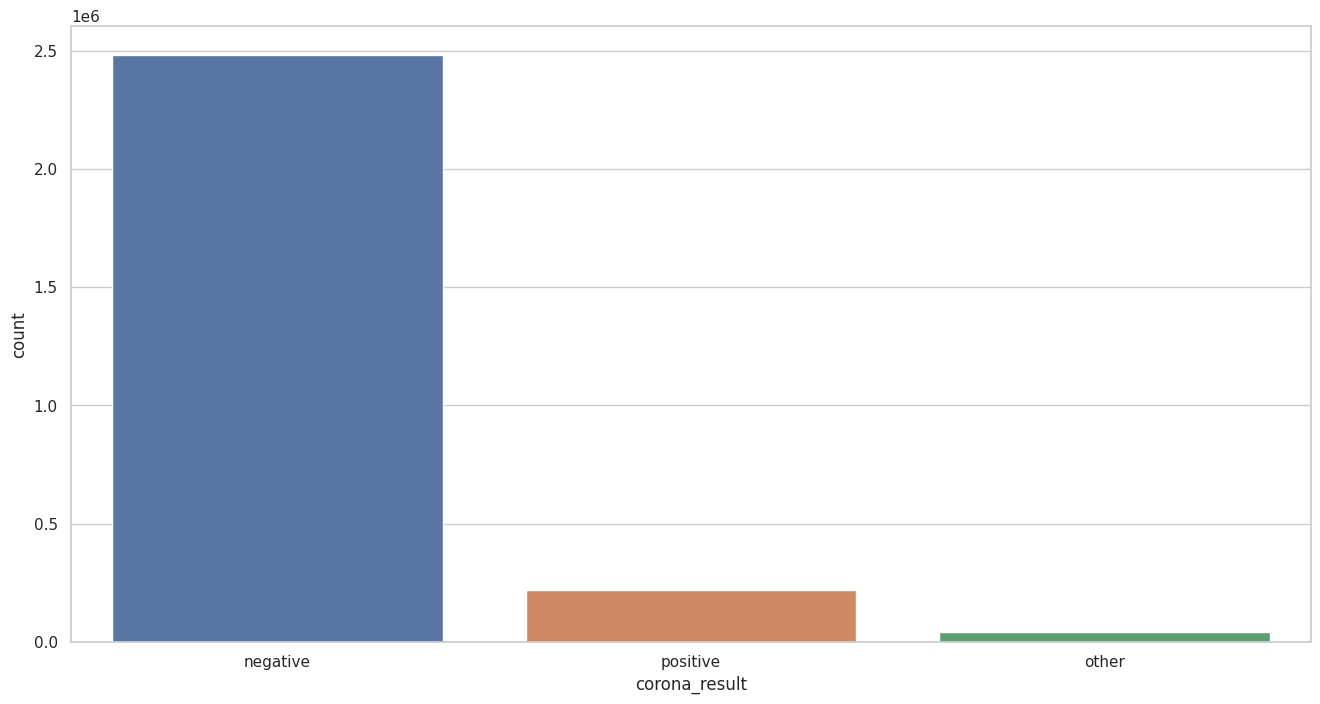

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['corona_result'])
plt.show()

### Age

In [12]:
df['age_60_and_above'].value_counts()

No     2456197
Yes     286399
Name: age_60_and_above, dtype: int64

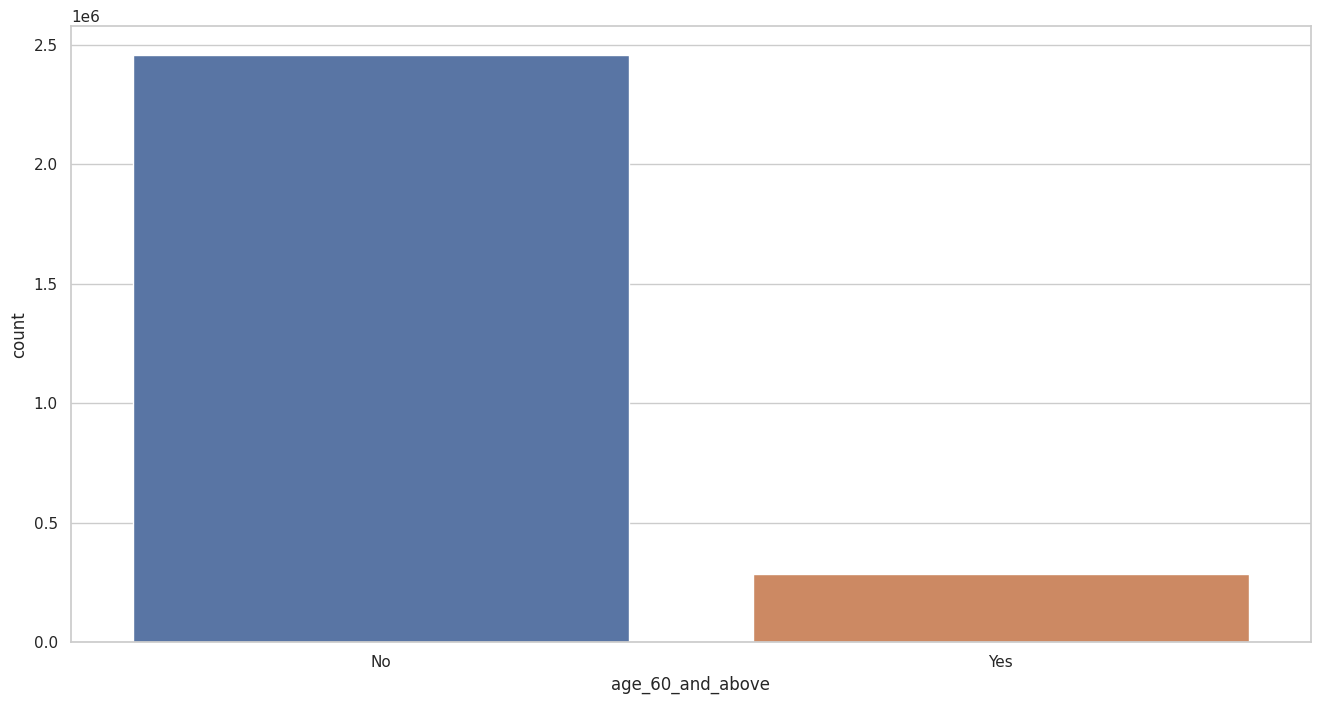

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['age_60_and_above'])
plt.show()

__Question:Is age and covid infection related?__

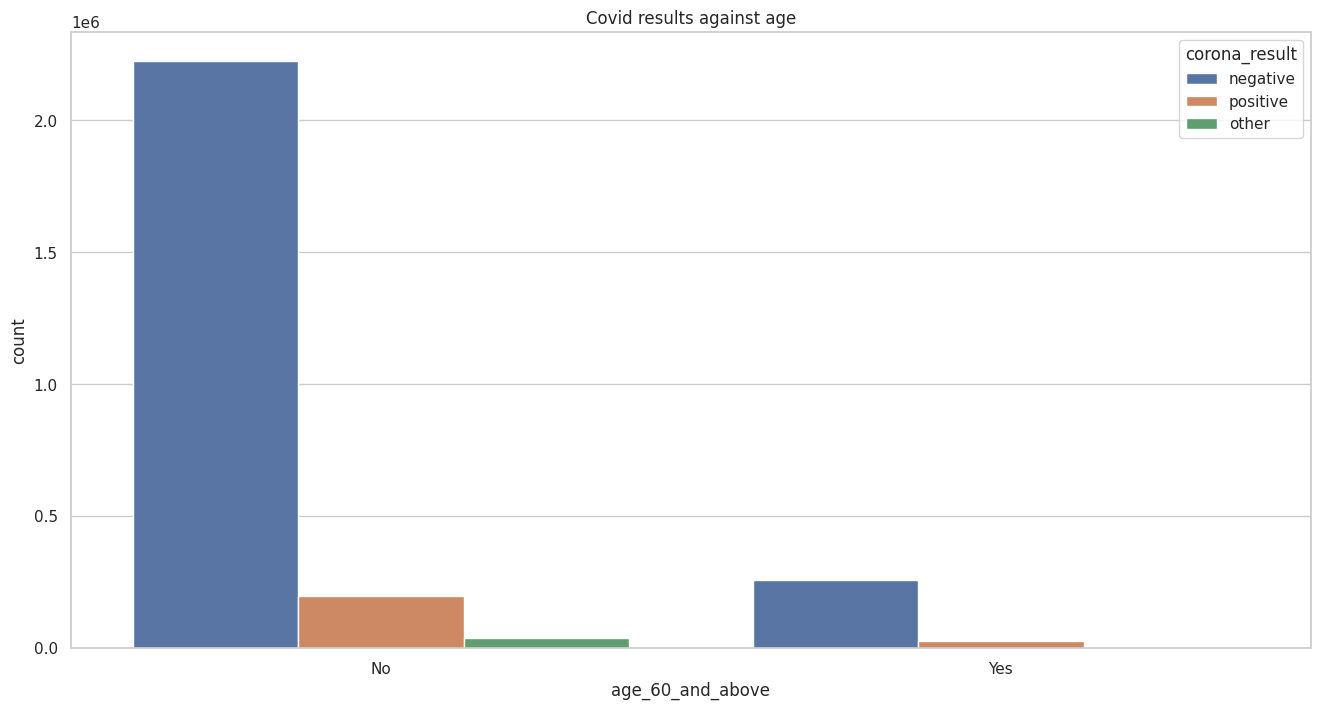

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['age_60_and_above'], hue = df['corona_result'])
plt.title("Covid results against age")
plt.show()

From the plot above we can see that most people who tested covid positive are not age 60 and above. 

### Gender

In [15]:
df['gender'].value_counts()

female    1464330
male      1278266
Name: gender, dtype: int64

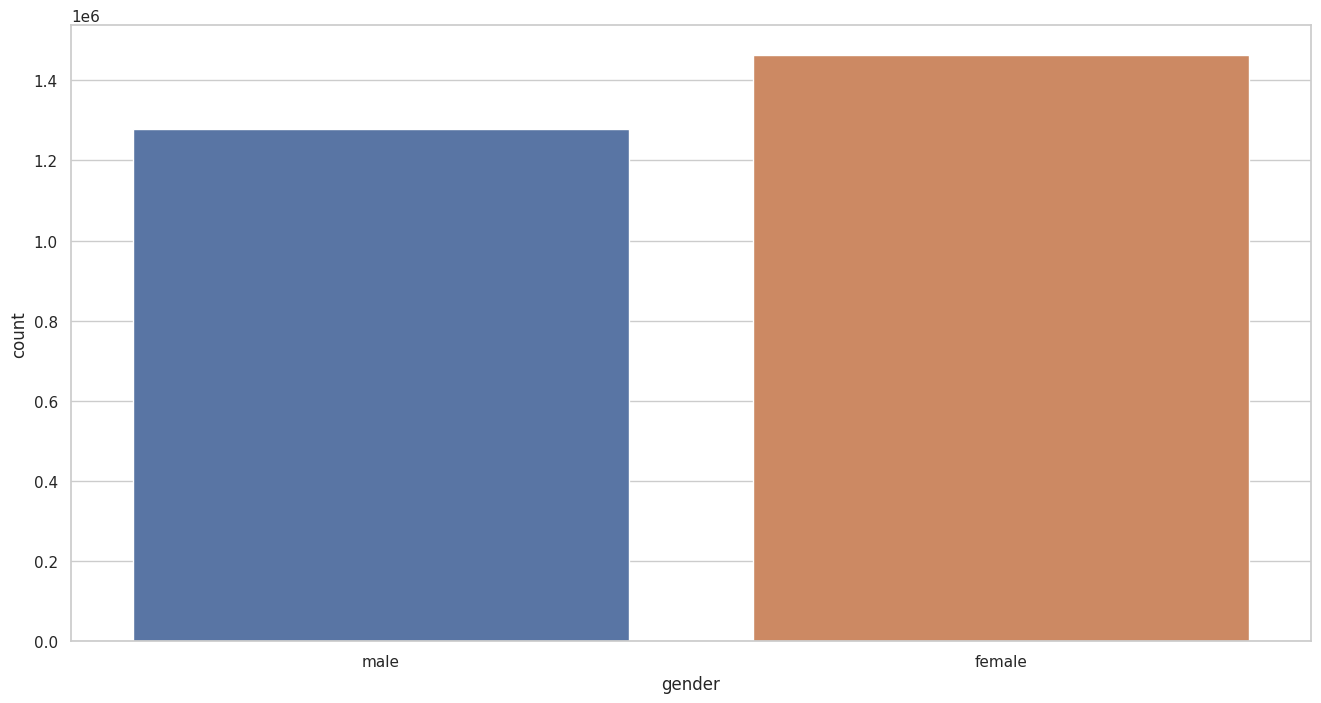

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['gender'])
plt.show()

__Question:Is gender and covid infection related?__

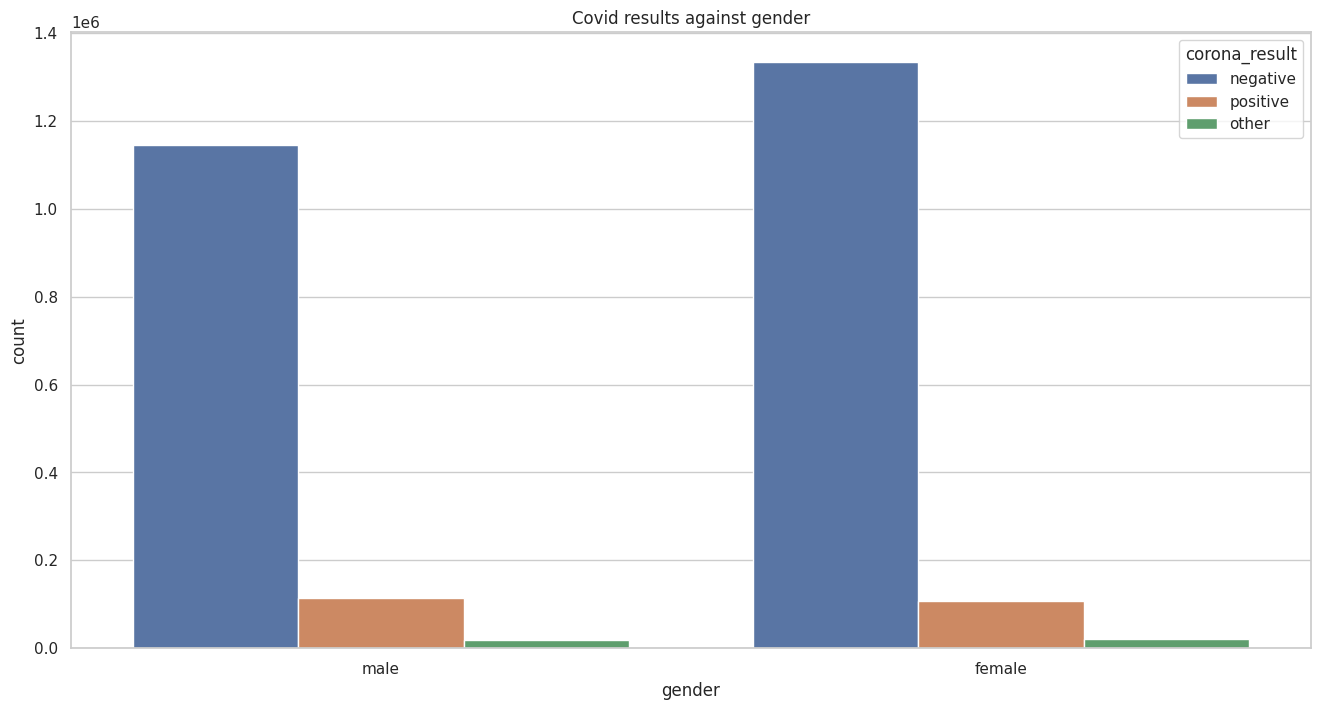

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['gender'], hue = df['corona_result'])
plt.title("Covid results against gender")
plt.show()

From the plot above, we can conclude that more males are covid positive since the no of covid cases between males and females are almost equal while the survey included more females.

### Test indication

In [18]:
df['test_indication'].value_counts()

Other                     2547559
Contact with confirmed     170742
Abroad                      24295
Name: test_indication, dtype: int64

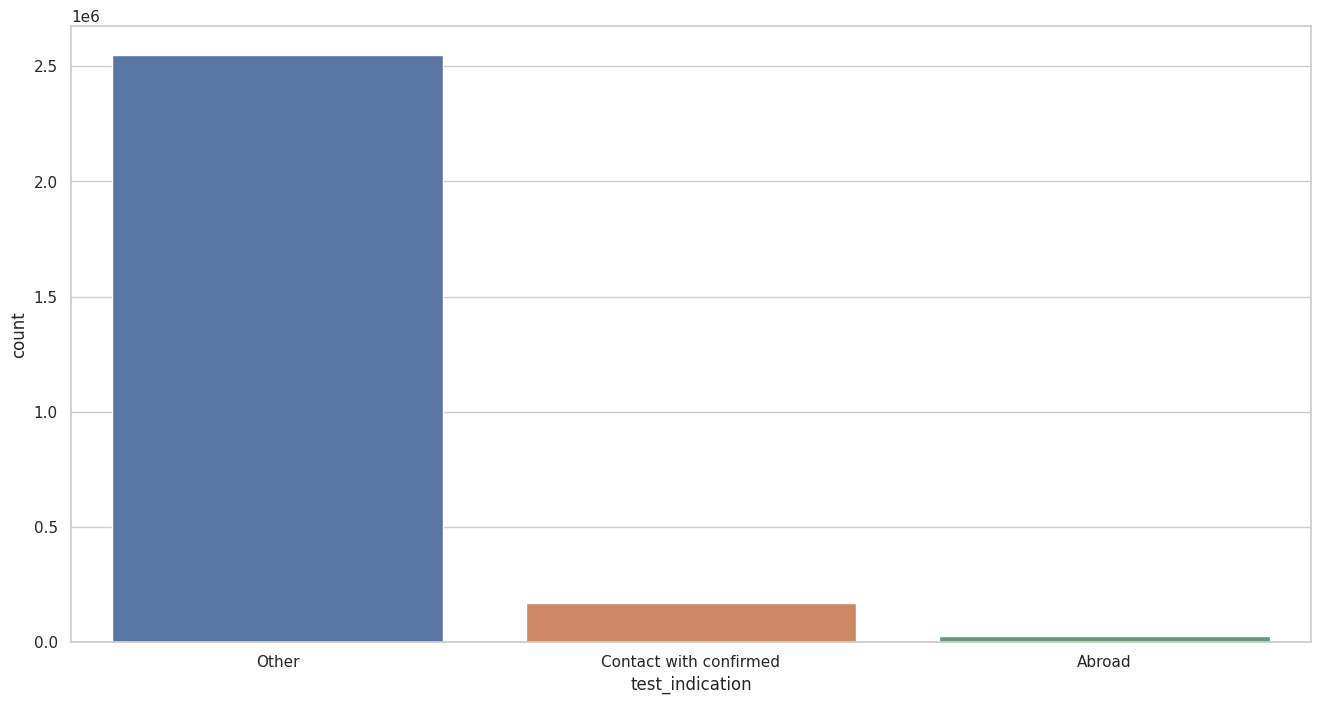

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['test_indication'])
plt.show()

__Question:Is Covid communicable once you get into contact with an infected person?__

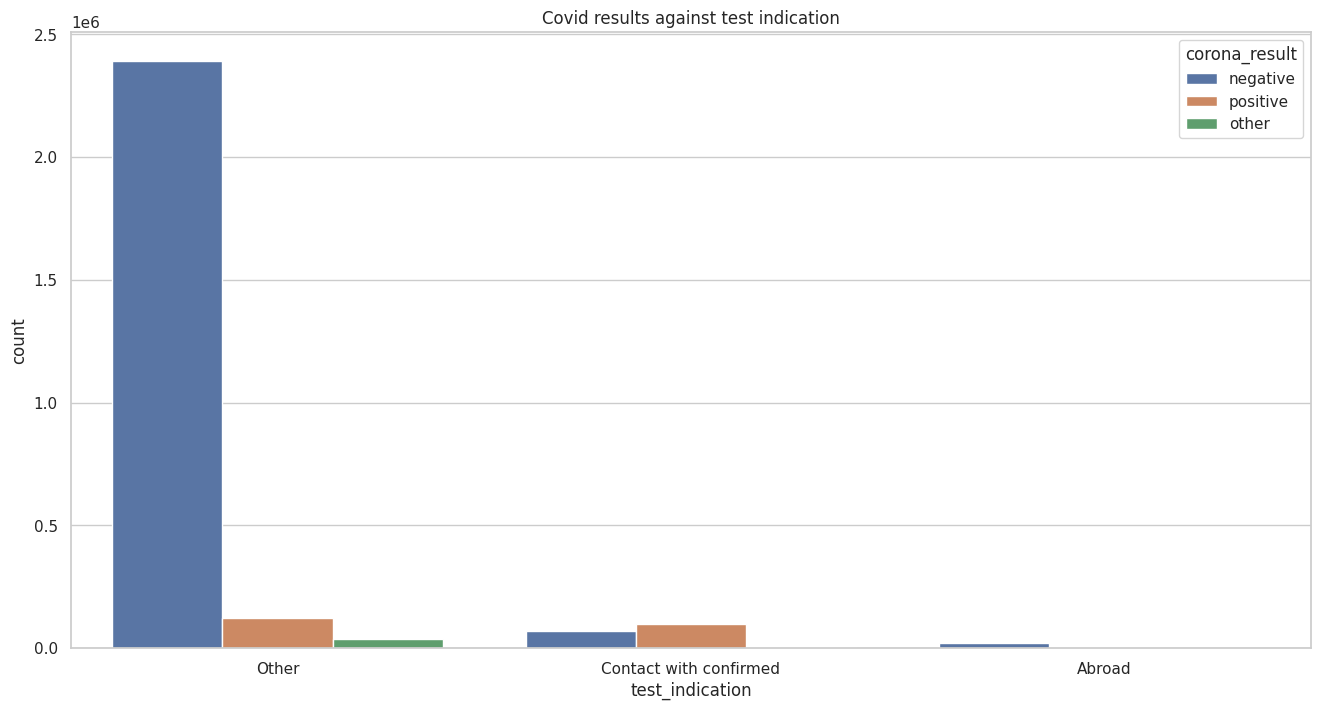

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['test_indication'], hue = df['corona_result'])
plt.title("Covid results against test indication")
plt.show()

From the plot above we can conclude that most patients who have had contact with infected people are covid positive.  

### Test date

In [21]:
df['test_date'].value_counts().max()

36557

### 2. NUMERICAL DATA

### Fever

In [22]:
df['fever'].value_counts()

0    2645600
1      96996
Name: fever, dtype: int64

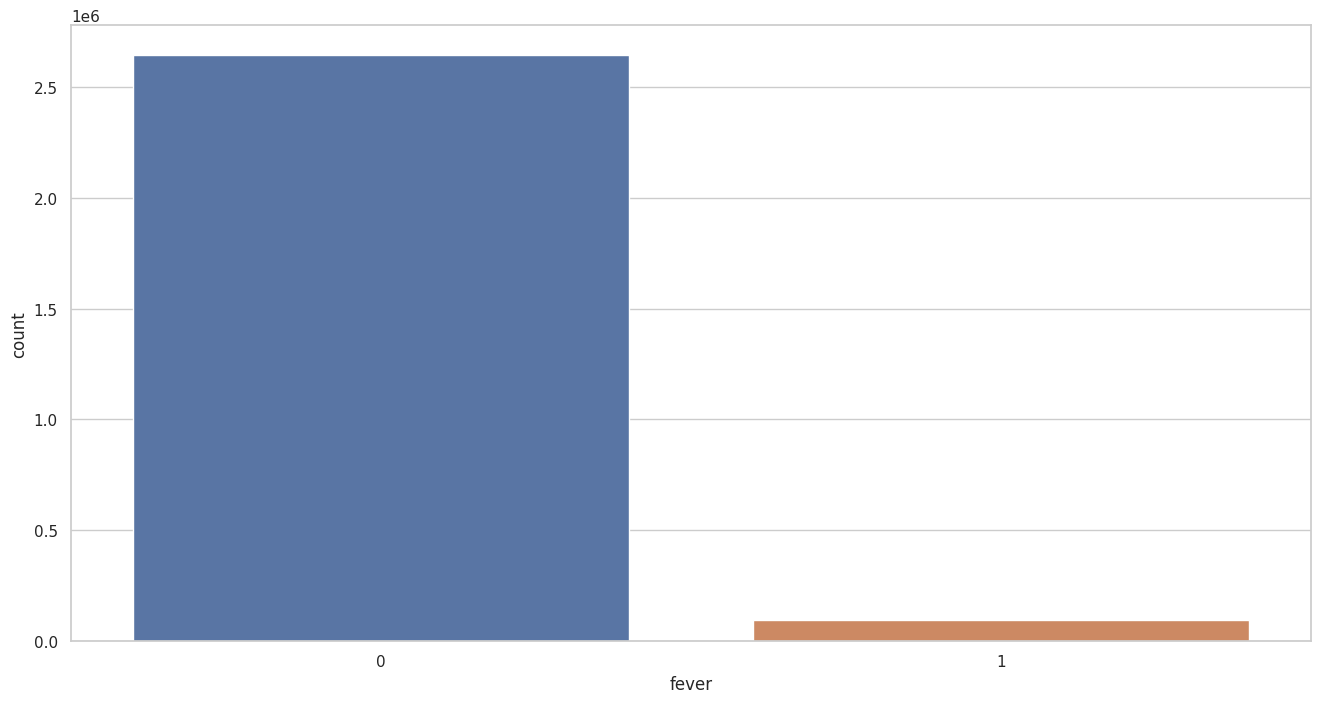

In [23]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['fever'])
plt.show()

__Question:Does the patient suffer from a fever?__

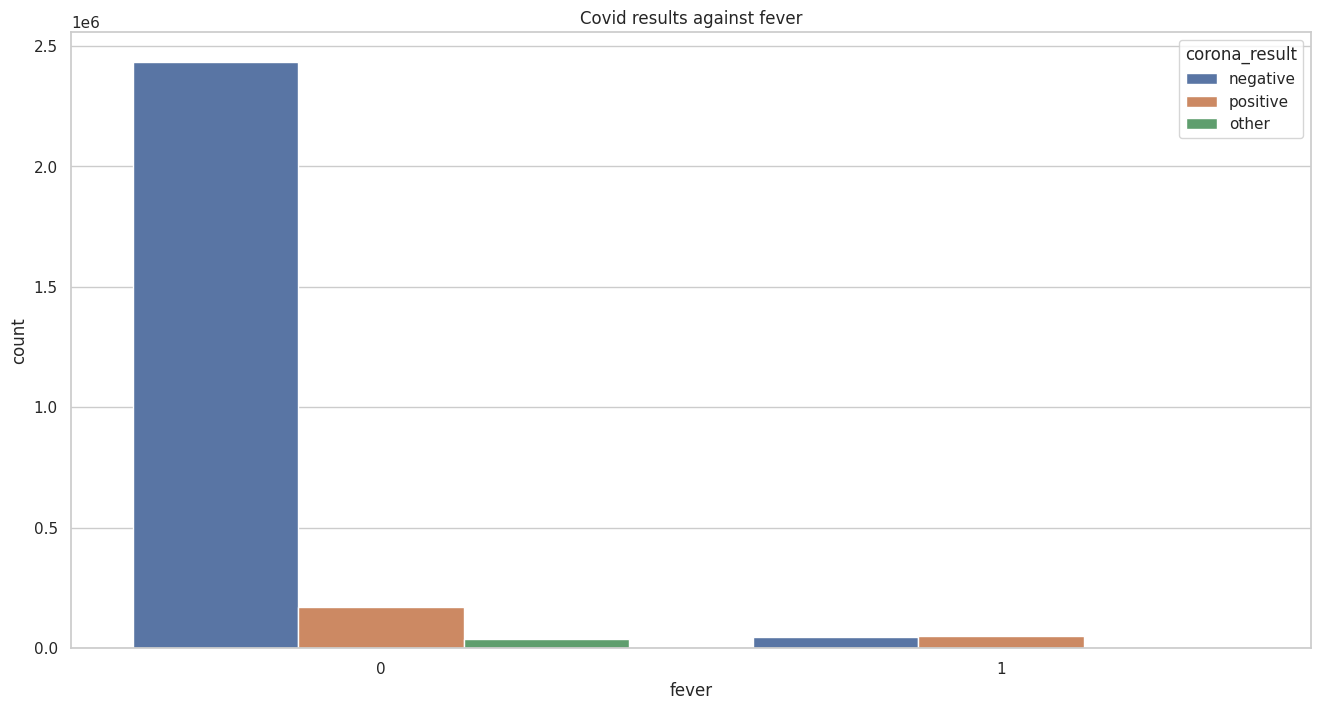

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['fever'], hue = df['corona_result'])
plt.title("Covid results against fever")
plt.show()

From the plot above, people who suffer from fever have a higher chance of testing positive for covid as compared to those who don't suffer from it. Hence fever is a significant sign of covid

### Cough

In [25]:
df['cough'].value_counts()

0    2631258
1     111338
Name: cough, dtype: int64

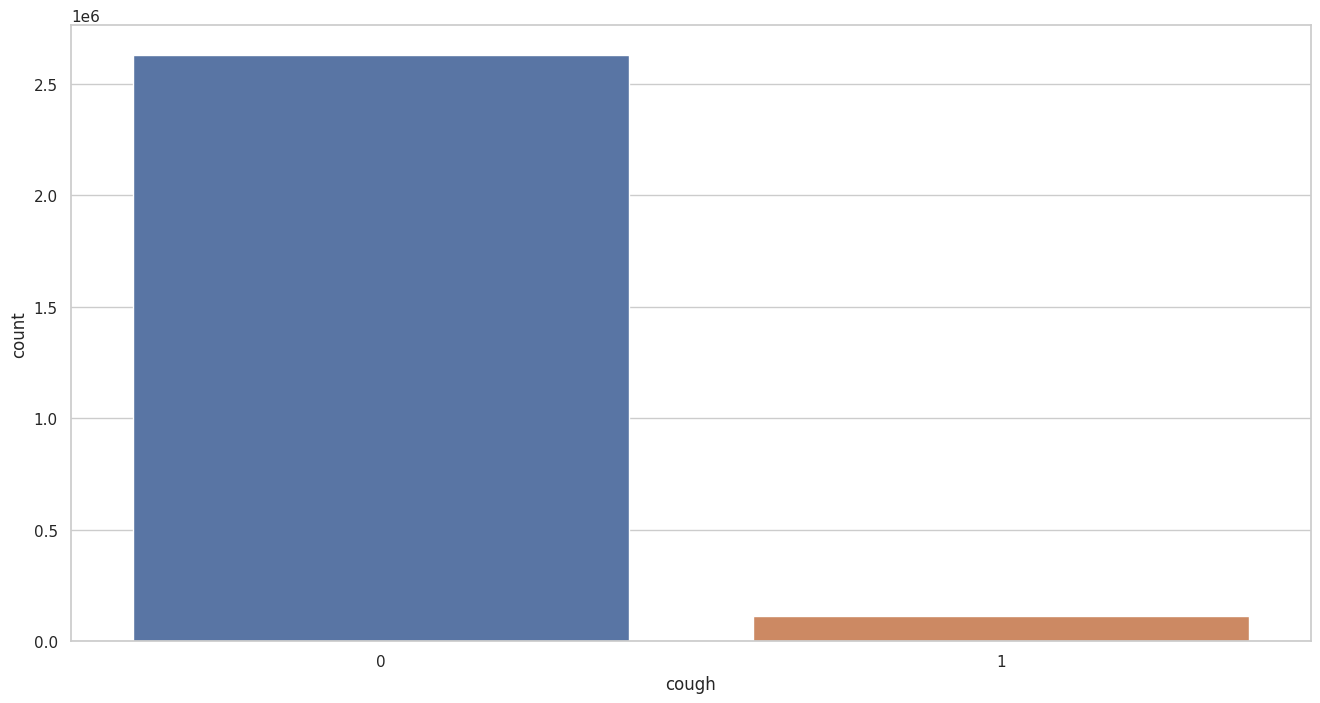

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['cough'])
plt.show()

__Question:Does the patient suffer from a cough?__

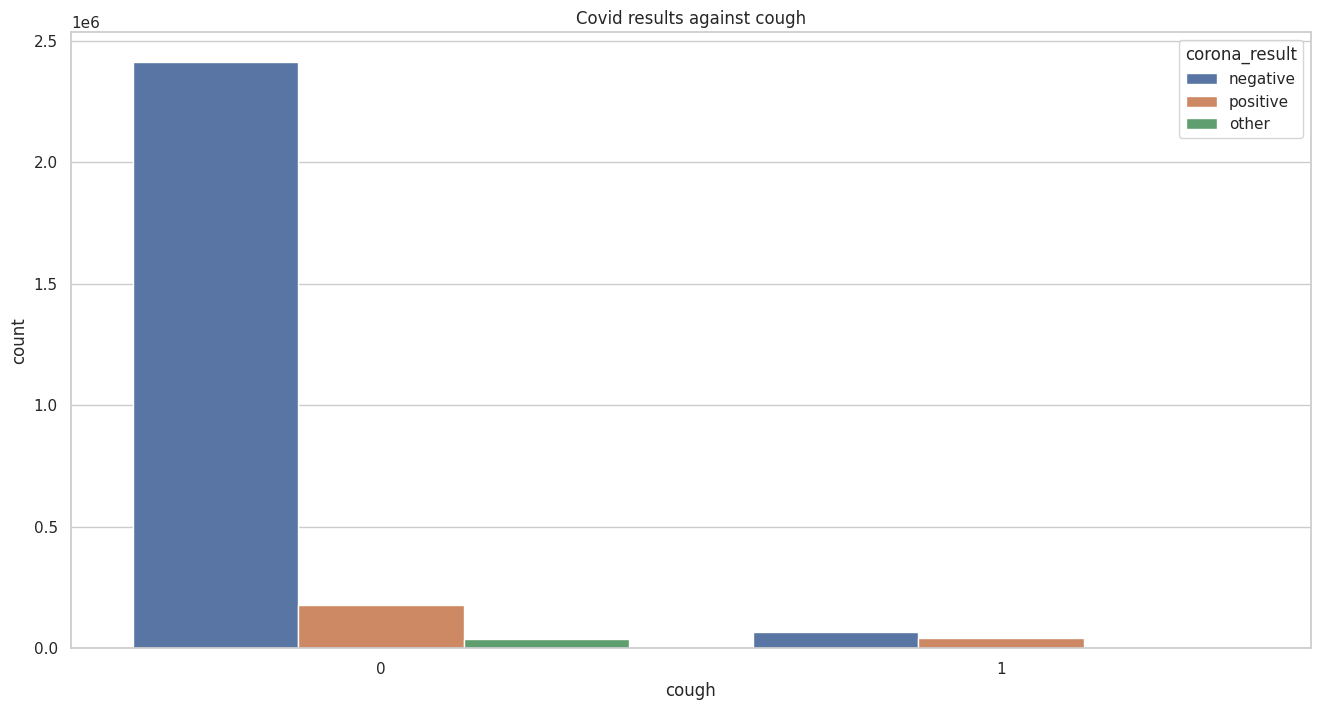

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['cough'], hue = df['corona_result'])
plt.title("Covid results against cough")
plt.show()

From the plot above we can conclude that cough is not a significant sign of covid. Most people who didn't suffer from cough tested positive for covid.

### Headache

In [28]:
df['head_ache'].value_counts()

0    2682655
1      59941
Name: head_ache, dtype: int64

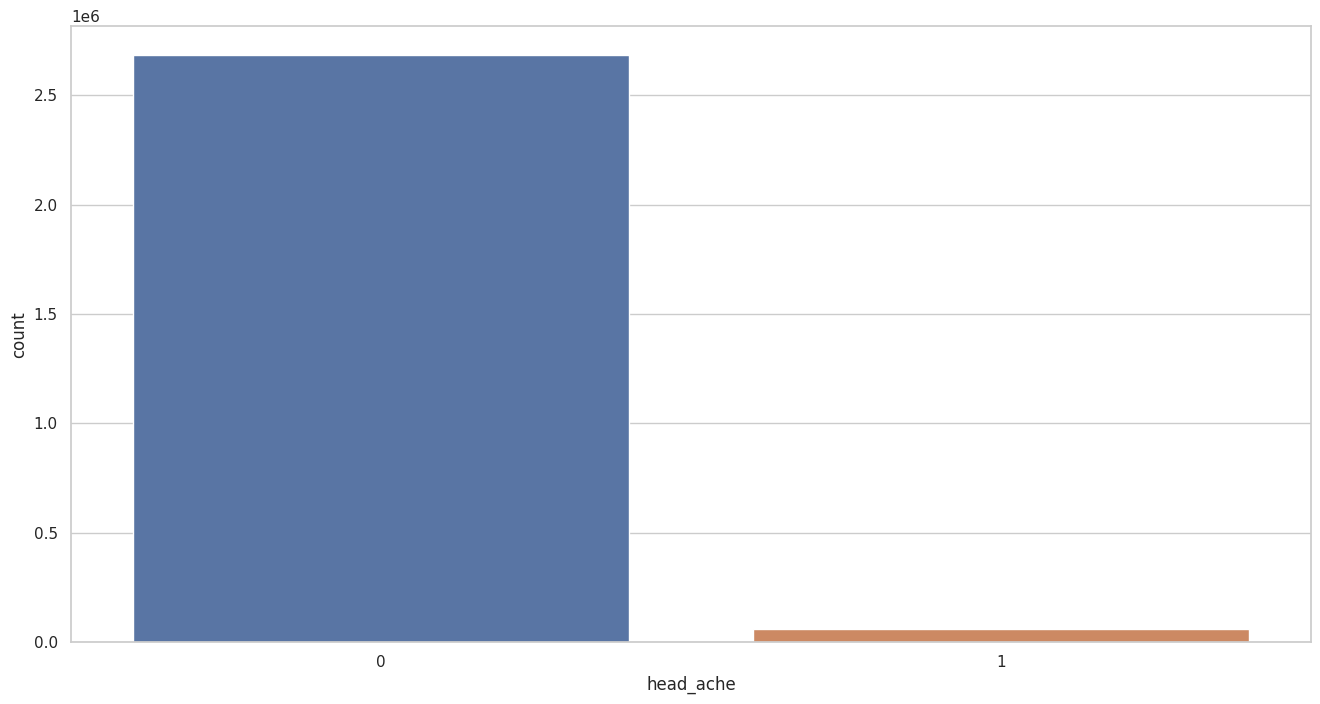

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['head_ache'])
plt.show()

__Question:Does the patient suffer from a headache?__

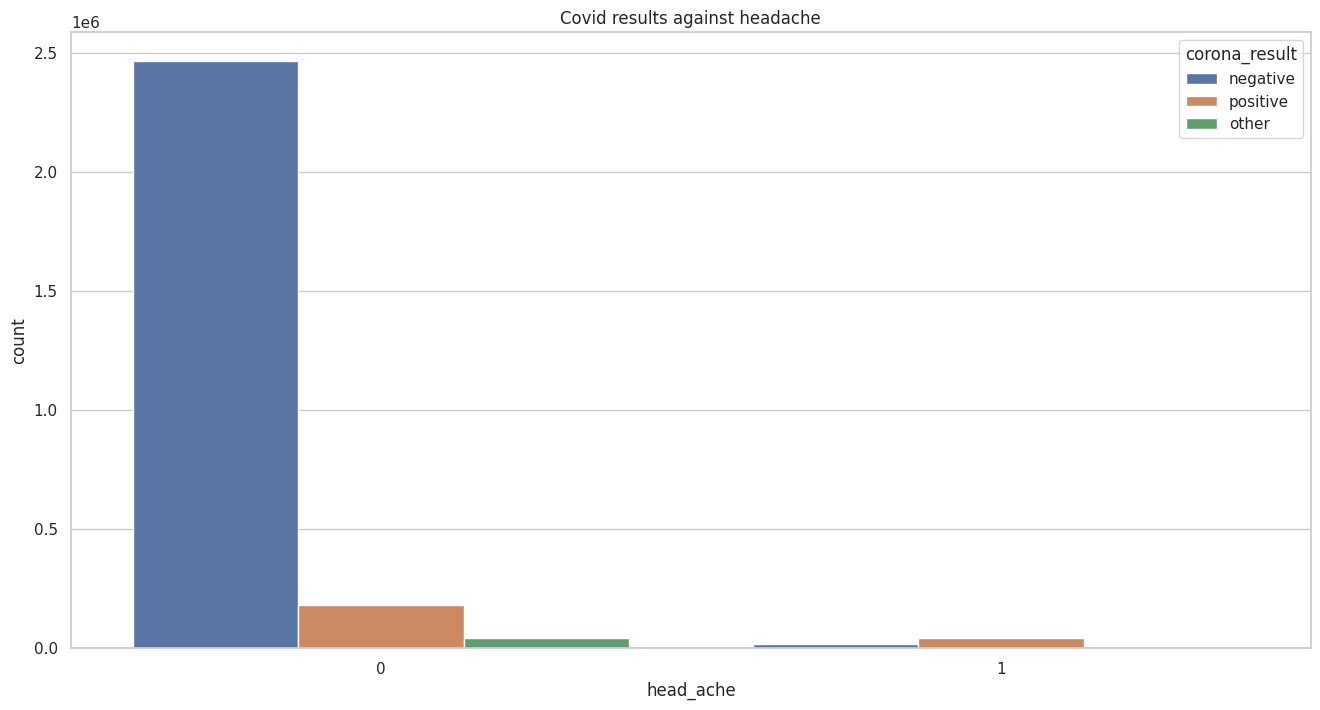

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['head_ache'], hue = df['corona_result'])
plt.title("Covid results against headache")
plt.show()

Headache might be a significant sign of covid since majority of the people who suffered from a headache also tested positive fpr covid.

### Shortness of breath

In [31]:
df['shortness_of_breath'].value_counts()

0    2731579
1      11017
Name: shortness_of_breath, dtype: int64

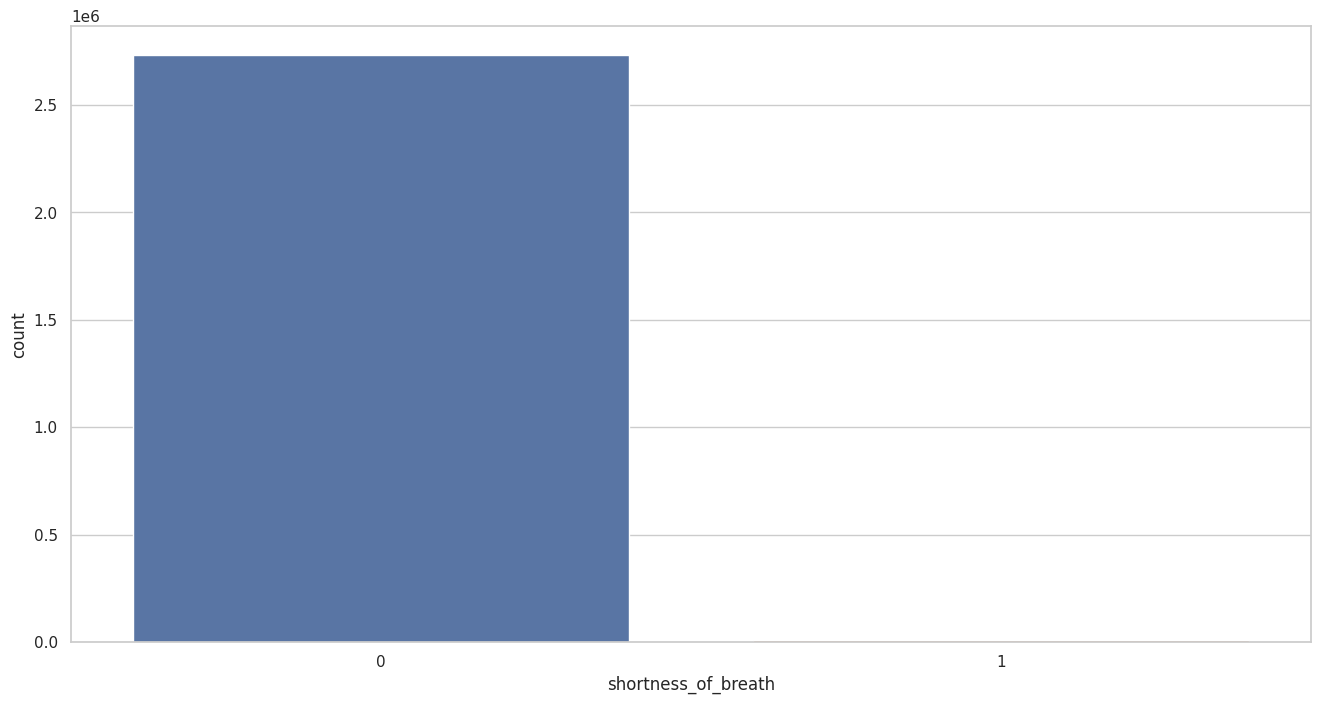

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['shortness_of_breath'])
plt.show()

__Question:Does the patient suffer from a shortness of breath?__

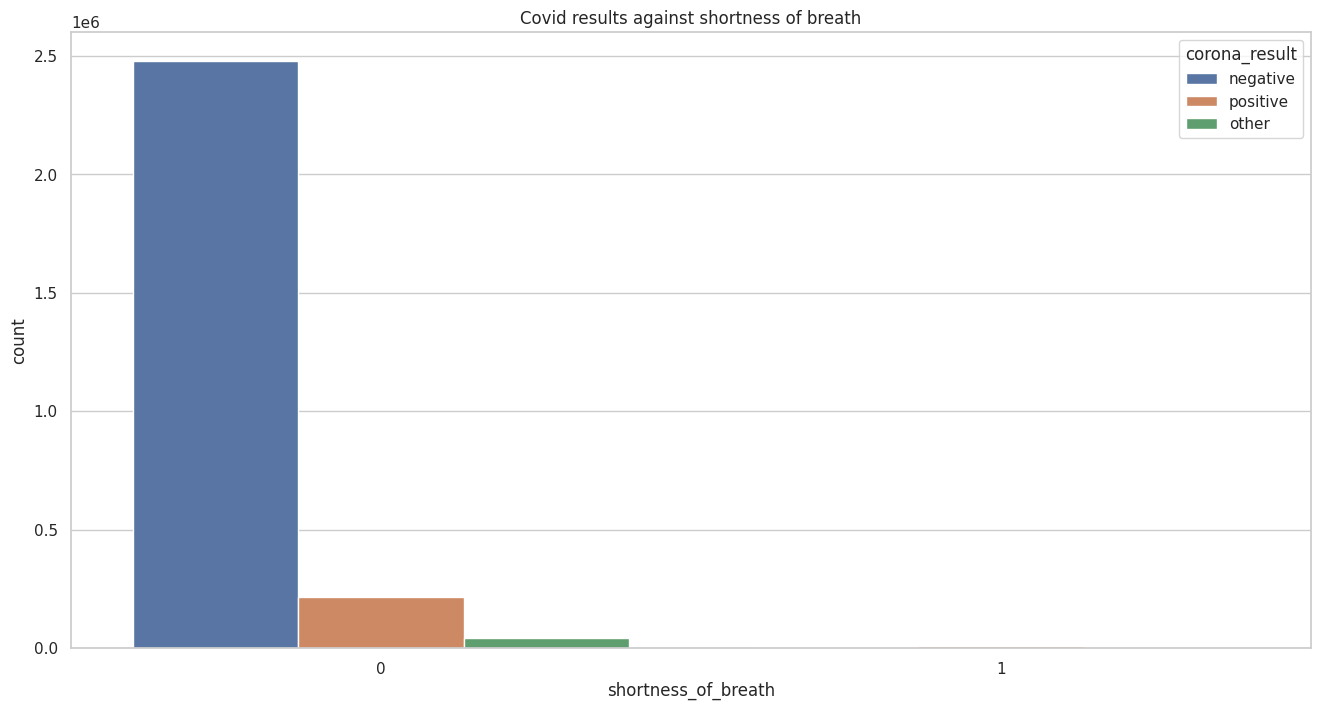

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['shortness_of_breath'], hue = df['corona_result'])
plt.title("Covid results against shortness of breath")
plt.show()

Shortness of breath may not be a significant sign of covid since most people who didn't suffer from shortness of breath tested positive for covid.

### Sore throat

In [34]:
df['sore_throat'].value_counts()

0    2712512
1      30084
Name: sore_throat, dtype: int64

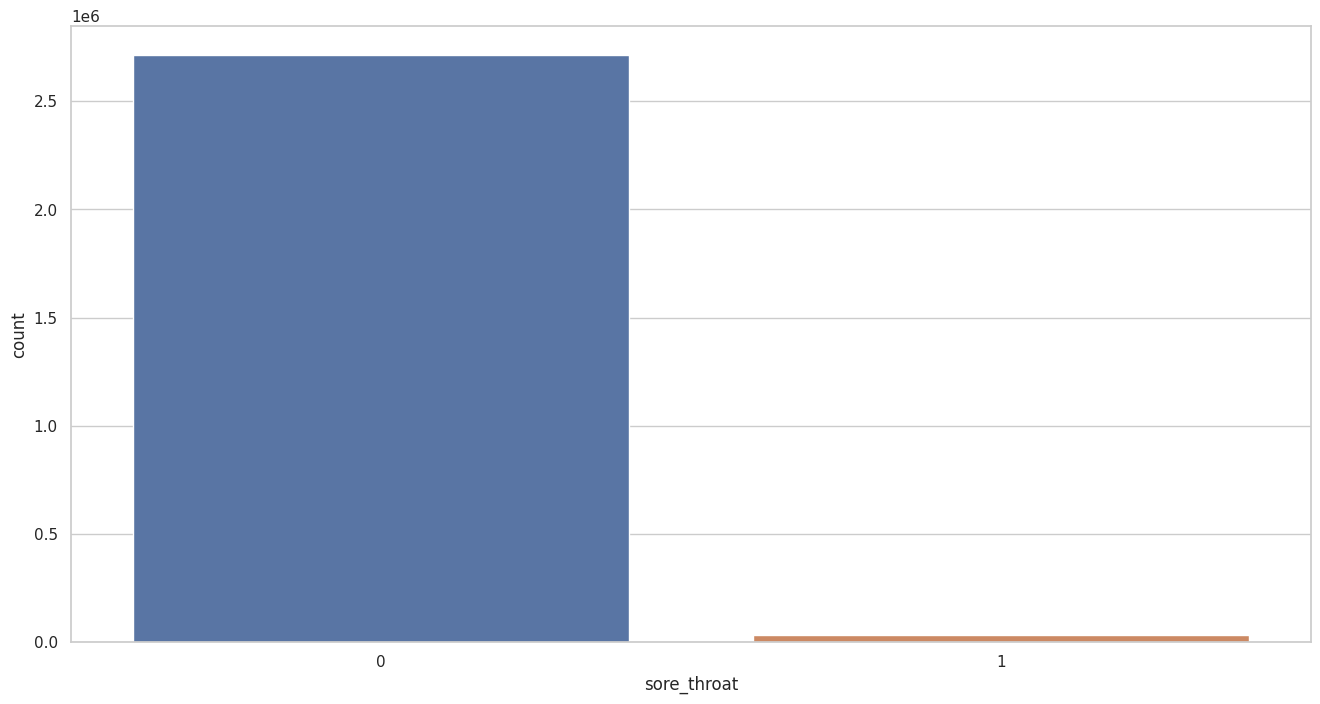

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['sore_throat'])
plt.show()

__Question:Does the patient suffer from a sore throat?__

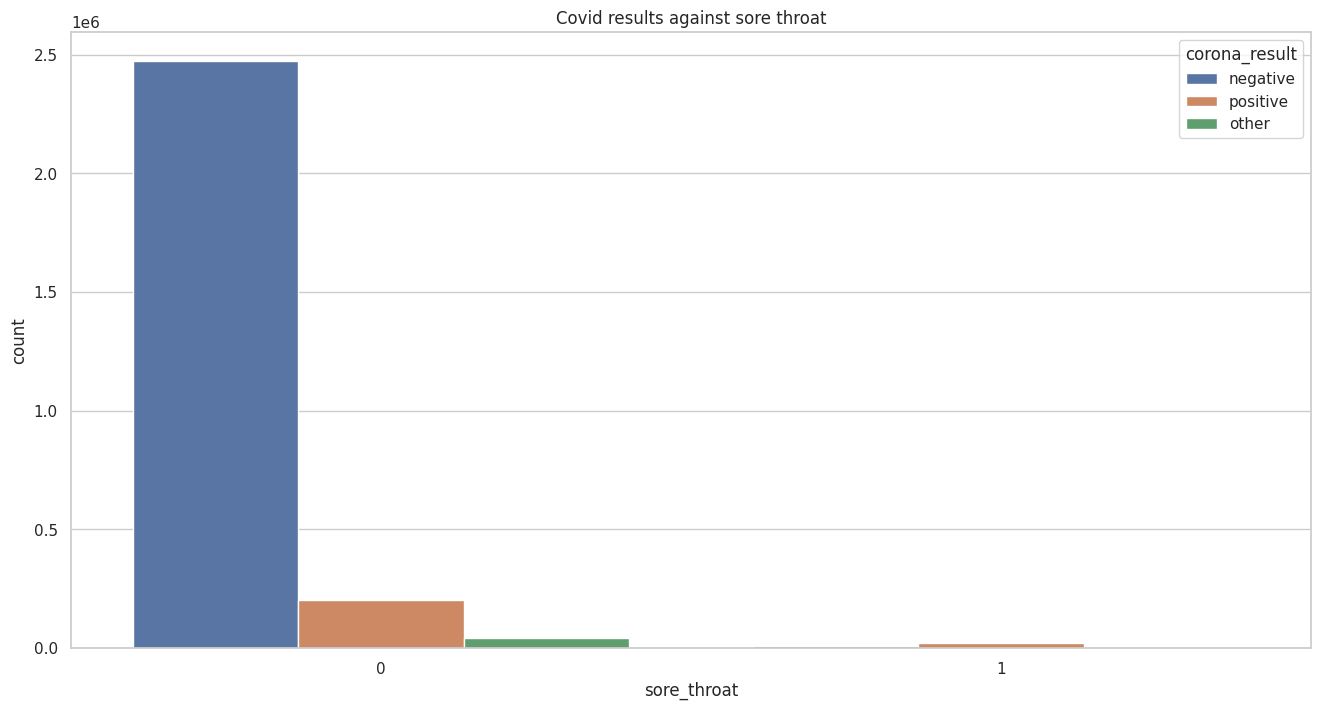

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['sore_throat'], hue = df['corona_result'])
plt.title("Covid results against sore throat")
plt.show()

From the plot above, most people who suffered from sore throat tested positive for covid. Hence sore throat is a significant sign of covid

## LABEL ENCODING

In [37]:
df.apply(lambda x: len(x.unique()))

test_date              247
cough                    2
fever                    2
sore_throat              2
shortness_of_breath      2
head_ache                2
corona_result            3
age_60_and_above         2
gender                   2
test_indication          3
dtype: int64

In [38]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

__Label encoding is done on categorical data with more than two value__

In [39]:
cat_columns = [col for col in df.select_dtypes('object').columns]
num_columns = [col for col in df.select_dtypes('int').columns]

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = ['test_date','corona_result' ,'test_indication']

for col in le_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,246,0,0,0,0,0,0,No,male,2
1,246,0,1,0,0,0,0,No,male,2
2,246,0,0,0,0,0,0,Yes,female,2
3,246,0,0,0,0,0,0,No,male,2
4,246,0,1,0,0,0,0,No,male,1


## ONE HOT ENCODING

In [41]:
df = pd.get_dummies(df, columns = ['gender','age_60_and_above'])
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication,gender_female,gender_male,age_60_and_above_No,age_60_and_above_Yes
0,246,0,0,0,0,0,0,2,0,1,1,0
1,246,0,1,0,0,0,0,2,0,1,1,0
2,246,0,0,0,0,0,0,2,1,0,0,1
3,246,0,0,0,0,0,0,2,0,1,1,0
4,246,0,1,0,0,0,0,1,0,1,1,0


__We can drop on column in gender and one in age 60 and above since they are similar__

In [42]:
df = df.drop(['gender_male','age_60_and_above_No'], axis= 1)
df.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication,gender_female,age_60_and_above_Yes
2742591,0,0,0,0,0,0,0,2,1,0
2742592,0,0,0,0,0,0,0,2,1,0
2742593,0,0,0,0,0,0,1,2,0,0
2742594,0,0,0,0,0,0,0,2,1,0
2742595,0,0,1,0,0,0,0,2,0,0


## CORRELATION

<AxesSubplot:>

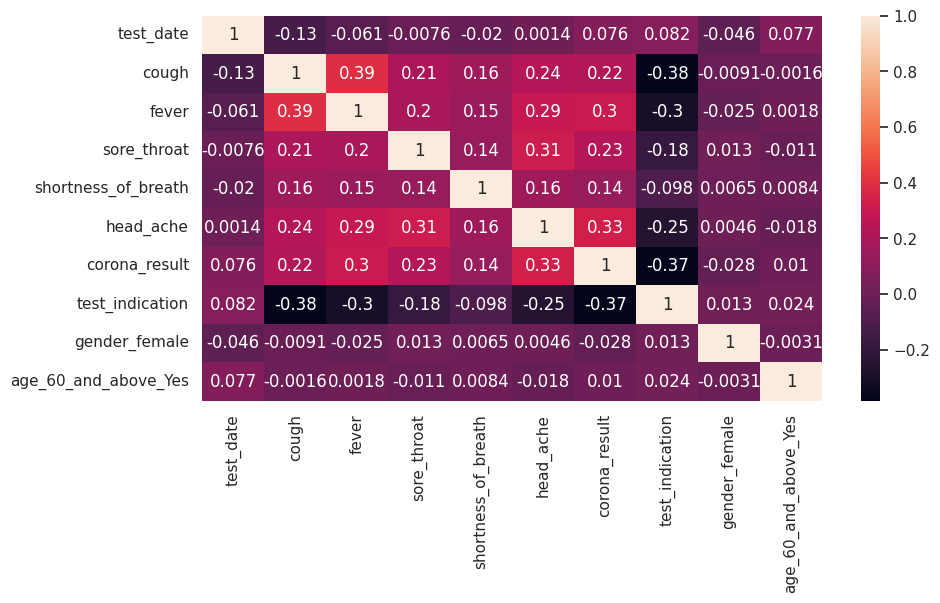

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

__Features with negative correlation with corona result__

In [44]:
df.corr()['corona_result'].sort_values()[df.corr()['corona_result'].sort_values() < 0]

test_indication   -0.372978
gender_female     -0.028134
Name: corona_result, dtype: float64

__Features with positive correlation with corona result__

In [45]:
df.corr()['corona_result'].sort_values()[df.corr()['corona_result'].sort_values() > 0]

age_60_and_above_Yes    0.010304
test_date               0.075974
shortness_of_breath     0.137368
cough                   0.224272
sore_throat             0.229005
fever                   0.304797
head_ache               0.331769
corona_result           1.000000
Name: corona_result, dtype: float64

## DECISION TREE

In [46]:
y = df['corona_result']
x = df.drop('corona_result', axis = 1)
x 

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,gender_female,age_60_and_above_Yes
0,246,0,0,0,0,0,2,0,0
1,246,0,1,0,0,0,2,0,0
2,246,0,0,0,0,0,2,1,1
3,246,0,0,0,0,0,2,0,0
4,246,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,0,2,1,0
2742592,0,0,0,0,0,0,2,1,0
2742593,0,0,0,0,0,0,2,0,0
2742594,0,0,0,0,0,0,2,1,0


In [47]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

# train model
model.fit(x,y)

DecisionTreeClassifier()

In [48]:
model.score(x,y)

0.931986701650553

In [49]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [50]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1919817, 9)
X_test (822779, 9)
y_train (1919817,)
y_test (822779,)


__Train data__

In [51]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state= 42)

model.fit(x,y)

DecisionTreeClassifier(random_state=42)

__Predict data__

In [52]:
y_predict = model.predict(X_test)
y_predict[1001]

0

From the prediction we can tell that person at row 1001 is covid negation

### CONFUSION MATRIX, ACCURACY SCORE and CLASSIFICATION REPORT TO SHOW SCORE

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[732899,      3,  11742],
       [ 11084,     78,   1007],
       [ 31601,     51,  34314]])

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9325602622332364

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    744644
           1       0.59      0.01      0.01     12169
           2       0.73      0.52      0.61     65966

    accuracy                           0.93    822779
   macro avg       0.75      0.50      0.53    822779
weighted avg       0.92      0.93      0.92    822779

